In [35]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

In [54]:
def E(X, P):
    """
    Expectation of a discrete random variable X with probability mass function P
    Formula : sum(x*p)
    """
    return sum([x*p for x, p in zip(X, P)])

def var(X, P):
    """
    Variance of a discrete random variable X with probability mass function P
    Formula : E[X^2] - E[X]^2
    """
    return E([x**2 for x in X], P) - E(X, P)**2

def standard_deviation(X, P):
    """
    Standard deviation of a discrete random variable X with probability mass function P
    Formula : sqrt(var(X))
    """
    return var(X, P)**0.5

def covariance(X, P, Y, Q):
    """
    Covariance of two discrete random variables X and Y with probability mass functions P and Q
    Formula : E[XY] - E[X]E[Y]
    """
    return E([x*y for x, y in zip(X, Y)], [p*q for p, q in zip(P, Q)]) - E(X, P)*E(Y, Q)

def correlation(X, P, Y, Q):
    """
    Correlation of two discrete random variables X and Y with probability mass functions P and Q
    Formula : cov(X, Y) / (std(X) * std(Y))
    """
    return covariance(X, P, Y, Q) / (standard_deviation(X, P) * standard_deviation(Y, Q))

def median(X, P):
    """
    Median of a discrete random variable X with probability mass function P
    Formula : x such that P(X <= x) = 0.5
    """
    P = np.cumsum(P)
    for i, p in enumerate(P):
        if p >= 0.5:
            return X[i]

def mode(X, P):
    """
    Mode of a discrete random variable X with probability mass function P
    Formula : x such that P(X = x) is maximum
    """
    return X[np.argmax(P)]

In [55]:
def plot(X, P, title=None, xlabel=None, ylabel=None):
    """
    Plot a discrete random variable X with probability mass function P
    """
    X_Y_Spline = make_interp_spline(X, P)
    # Returns evenly spaced numbers
    # over a specified interval.
    X_ = np.linspace(X.min(), X.max(), 500)
    Y_ = X_Y_Spline(X_)
    
    plt.plot(X_, Y_)
    plt.scatter(E(X, P), 0, color='red', label='E(X)')
    plt.scatter(median(X, P), 0, color='green', label='Median(X)')
    plt.scatter(mode(X, P), 0, color='blue', label='Mode(X)')
    plt.legend()

    plt.title(title) 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [58]:
X = np.array([1, 2, 3, 4])
P = np.array([1/6, 1/3, 1/3, 1/6])

print("X = ", X)
print("P(X) = ", P)
print()
print("Median = ", median(X, P))
print("E[X] or mean(mu) = ", E(X, P))
print("Mode = ", mode(X, P))
print("Var(X) = ", var(X, P))
print("Standard Deviation = ", standard_deviation(X, P))

X =  [1 2 3 4]
P(X) =  [0.16666667 0.33333333 0.33333333 0.16666667]

Median =  2
E[X] or mean(mu) =  2.5
Mode =  2
Var(X) =  0.9166666666666661
Standard Deviation =  0.9574271077563378


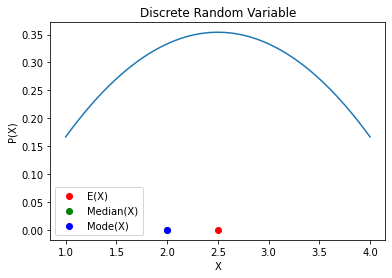

In [59]:
plot(X, P, title="Discrete Random Variable", xlabel="X", ylabel="P(X)")